In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


In [70]:
dataset = pd.read_csv('term-deposit-marketing-2020.csv')
term_deposits = dataset.copy()
dataset.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no


In [71]:
dataset.dtypes ##Looking data types
dataset[dataset.isnull().any(axis=1)] # Checked for any rows containing a NaN value

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y


## LabelEncoder

In [72]:
from sklearn import preprocessing   
le = preprocessing.LabelEncoder()   
dataset['job'] = le.fit_transform(dataset['job'])
dataset['marital'] = le.fit_transform(dataset['marital'])
dataset['education'] = le.fit_transform(dataset['education'])
dataset['default'] = le.fit_transform(dataset['default'])
dataset['contact'] = le.fit_transform(dataset['contact'])
dataset['month'] = le.fit_transform(dataset['month'])
dataset['housing'] = le.fit_transform(dataset['housing'])
dataset['loan'] = le.fit_transform(dataset['loan'])
dataset['y'] = le.fit_transform(dataset['y'])


dataset.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0


## Getting training and target column

In [73]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting Data

In [74]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
#5-Fold Cross-Validation for Logistic Regression
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5)
print("min score:",logreg_scores.min(),"  mean score:", logreg_scores.mean(), "  max score:", logreg_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

min score: 0.9313333333333333   mean score: 0.9328666666666667   max score: 0.9343333333333333
[[9158   93]
 [ 616  133]]


/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

## K-Nearest Neighbor Classifier

In [76]:


from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2) # if p=2, it will be euclidian distance
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#5-Fold Cross-Validation for KNN
knn_scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Cross Validation Scores:")
print("min score:",knn_scores.min(),"  mean score:", knn_scores.mean(), "  max score:", knn_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

Cross Validation Scores:
min score: 0.9236666666666666   mean score: 0.9248333333333333   max score: 0.9265
[[9136  115]
 [ 659   90]]


## Decision Tree Classifier

In [77]:
#DecisionTree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

#5-Fold Cross-Validation for 
dtc_scores = cross_val_score(dtc, X_train, y_train, cv=5)
print("min score:",dtc_scores.min(),"  mean score:", dtc_scores.mean(), "  max score:", dtc_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

min score: 0.9111666666666667   mean score: 0.9146333333333333   max score: 0.9176666666666666
[[8814  437]
 [ 422  327]]


## Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)

#5-Fold Cross-Validation for Random Forest Classifier
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("min score:",rf_scores.min(),"  mean score:", rf_scores.mean(), "  max score:", rf_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

min score: 0.9335   mean score: 0.9359666666666667   max score: 0.9373333333333334
[[9096  155]
 [ 526  223]]


## Naive Bayes Classifier

In [79]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

#5-Fold Cross-Validation for Naive Bayes Classifier
nb_scores = cross_val_score(nb, X_train, y_train, cv=5)
print("min score:",nb_scores.min(),"  mean score:", nb_scores.mean(), "  max score:", nb_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

min score: 0.928   mean score: 0.9306666666666666   max score: 0.9331666666666667
[[8989  262]
 [ 479  270]]


## Gradient Boosting Classifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred== gb.predict(X_test)

#5-Fold Cross-Validation for Naive Bayes Classifier
gb_scores = cross_val_score(gb, X_train, y_train, cv=5)
print("min score:",gb_scores.min(),"  mean score:", gb_scores.mean(), "  max score:", gb_scores.max())
cm = confusion_matrix(y_test, y_pred)
print(cm)

min score: 0.9361666666666667   mean score: 0.9372   max score: 0.9381666666666667
[[8989  262]
 [ 479  270]]


## Comparing Accuracy to Choose the Best Algorithm

Logistic Regression Mean Accuracy Score: 93.2867%
KNN Mean Accuracy Score: 92.4833%
Naive Bayes Mean Accuracy Score: 93.0667%
Decision Tree Mean Accuracy Score: 91.4633%
Random Forest Mean Accuracy Score: 93.5967%
Gradient Boosting Mean Accuracy Score: 93.7200%


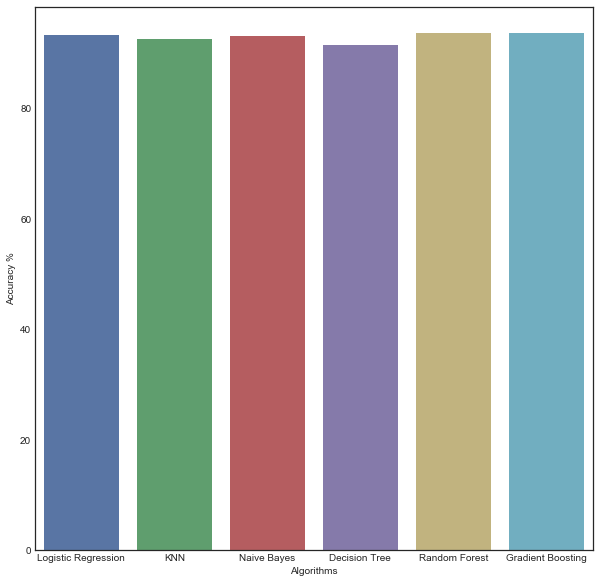

In [81]:
methods = ["Logistic Regression","KNN", "Naive Bayes", "Decision Tree", "Random Forest","Gradient Boosting"]
accuracy = [logreg_scores.mean()*100, knn_scores.mean()*100, nb_scores.mean()*100,dtc_scores.mean()*100, rf_scores.mean()*100, gb_scores.mean()*100]

plt.figure(figsize=(10,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette="deep")

for name,score in zip(methods,accuracy):
    print(name,"Mean Accuracy Score: {:.4f}%".format(score))

##  Finding the feature that most positively correlates

In [94]:
importances = gb.feature_importances_
feature_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign']
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),feature_names[indices[f]]) 

Feature ranking:
1. feature 11 (0.709327) duration
2. feature 10 (0.130749) month
3. feature 9 (0.048772) day
4. feature 8 (0.033142) contact
5. feature 0 (0.028210) age
6. feature 6 (0.019497) housing
7. feature 2 (0.011554) marital
8. feature 5 (0.008752) balance
9. feature 12 (0.003438) campaign
10. feature 3 (0.002419) education
11. feature 1 (0.002122) job
12. feature 7 (0.001062) loan
13. feature 4 (0.000956) default


 ## According the these results:
 ### GradientBoosting Classifier is the most successful algorithm for our case. It has %93.71 accuracy rate.
 ### The most effective feature is 'Duration'.  Duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit. I think we should focus to these feature and we should target individuals with a higher duration
 #### Mert Agcakoyun , email: mert.agcakoyun21@gmail.com